# 課題: 補助線を引かずに初等幾何学の問題を解く

余弦定理の底角を含む二式と等辺の式を連立して簡約する:
* [Law of cosines - Wikipedia](https://en.wikipedia.org/wiki/Law_of_cosines)

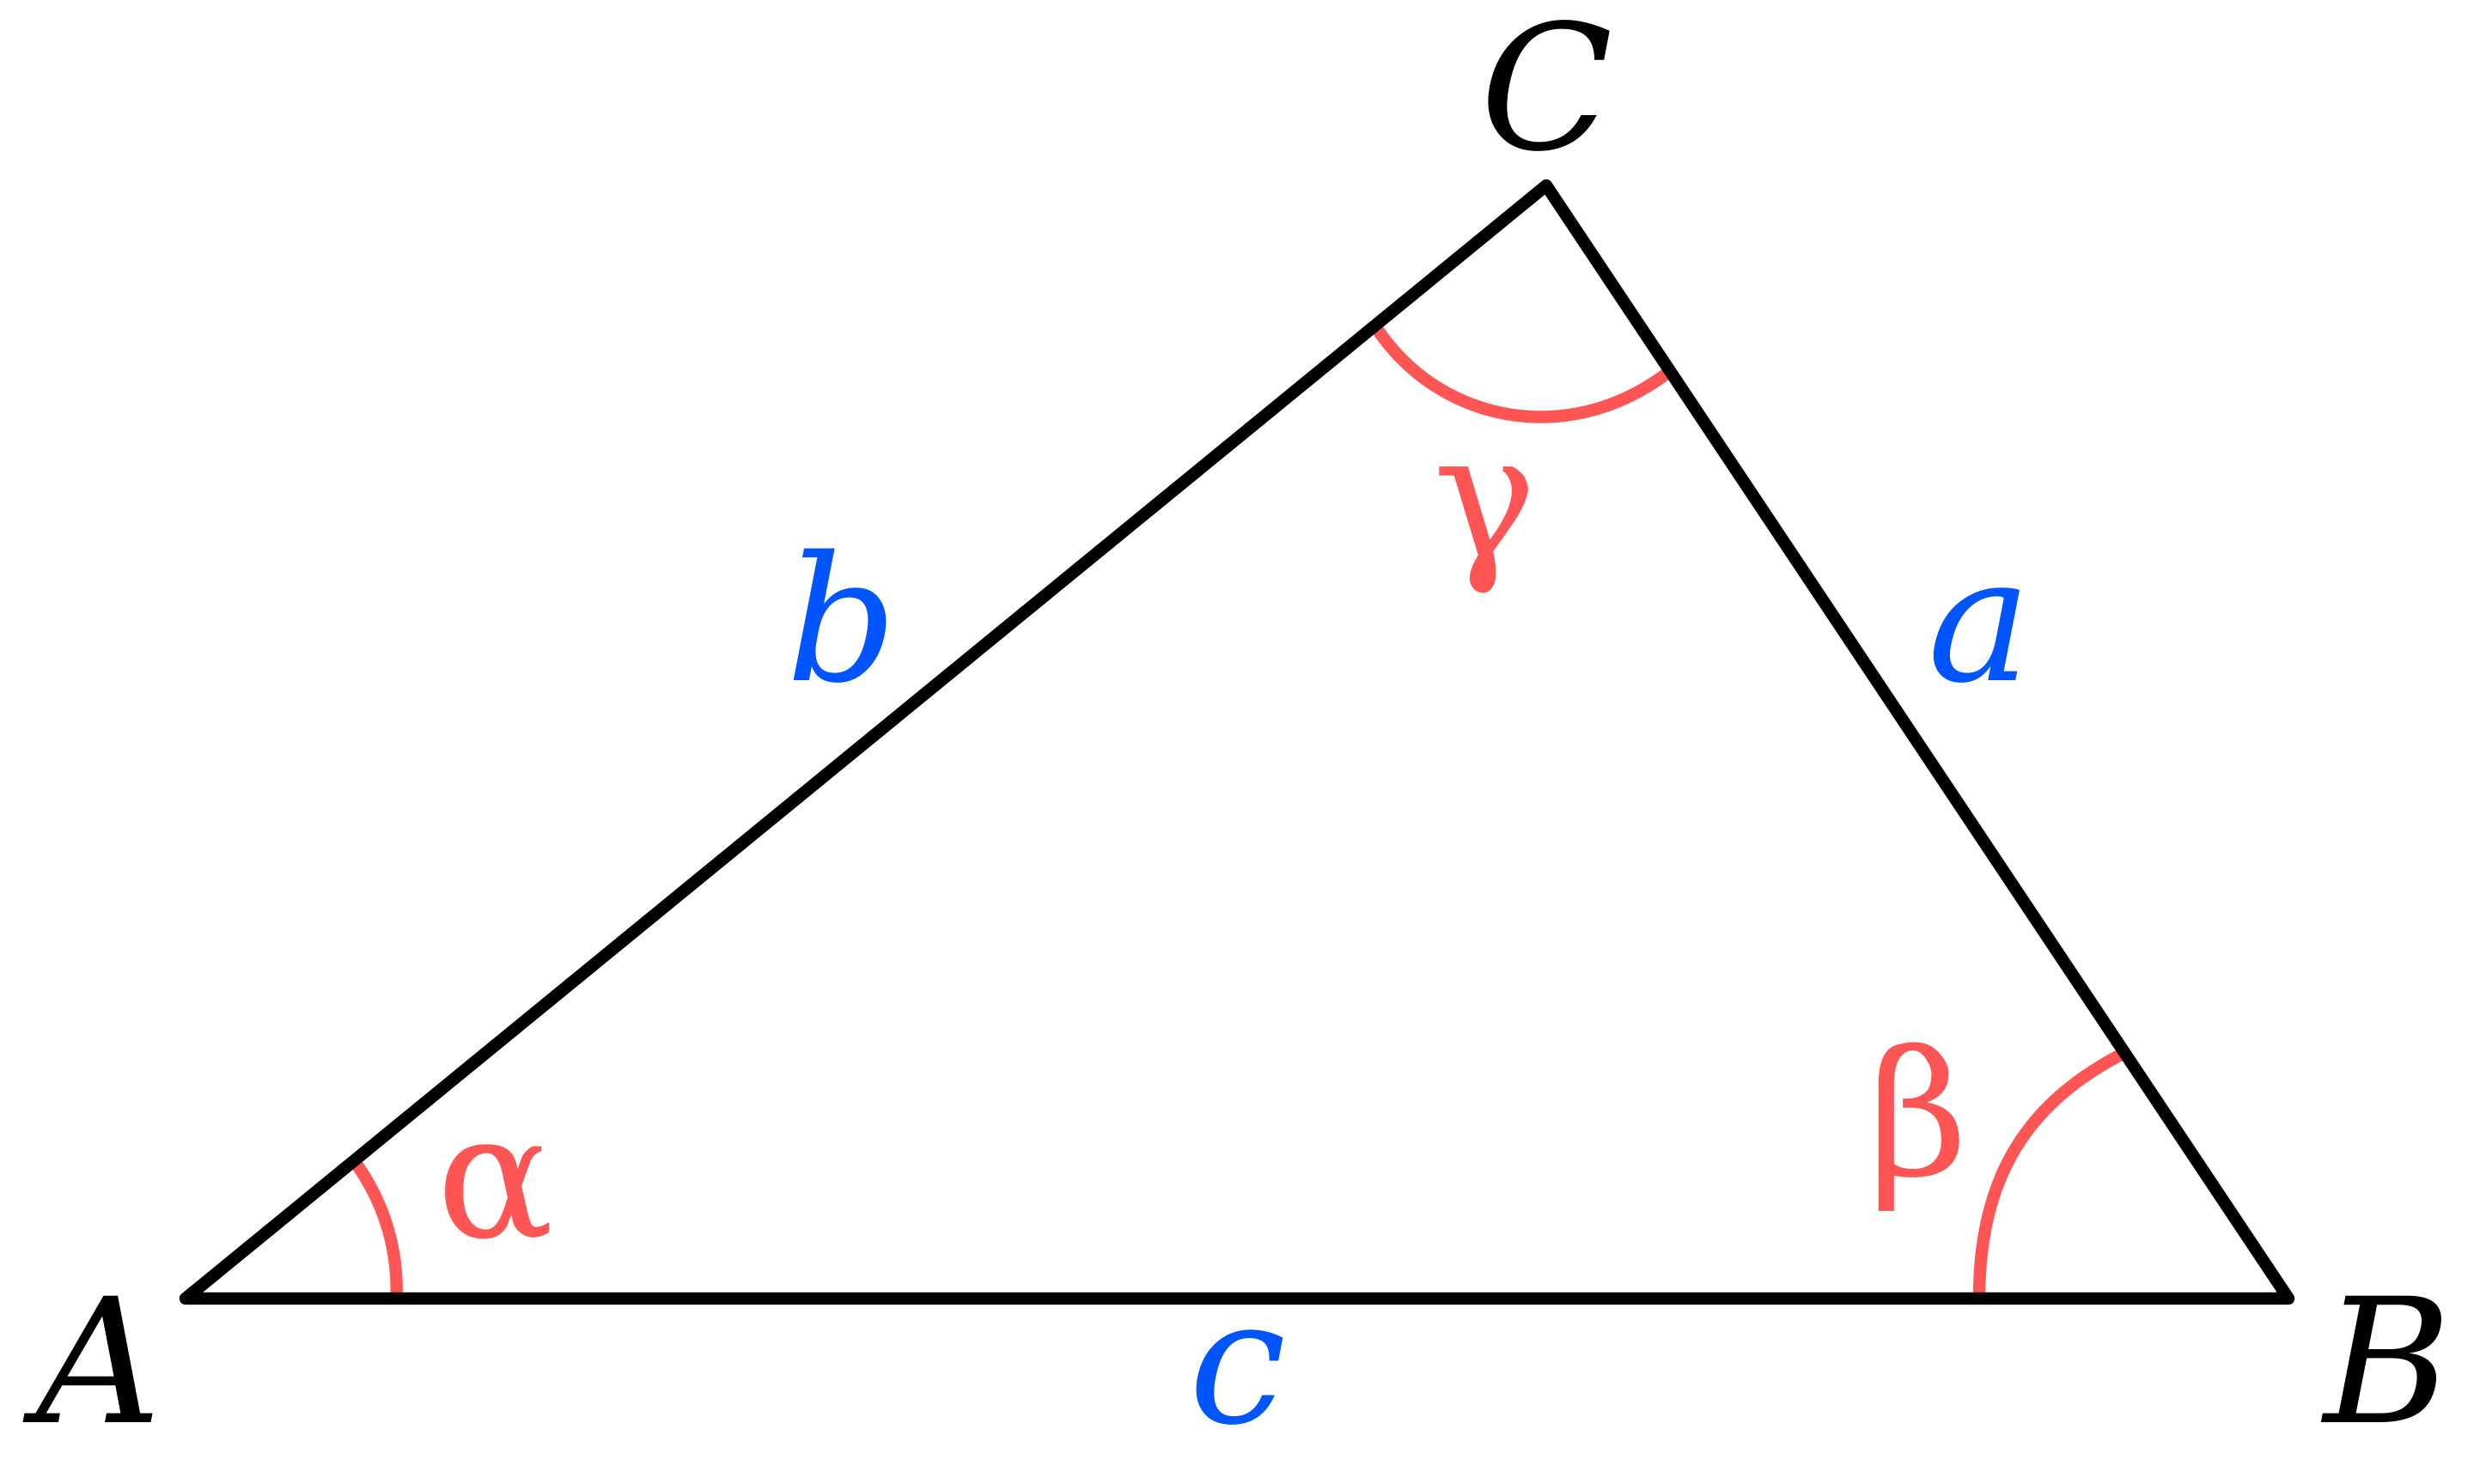

余弦定理の公式うち、底角に関連する二式と二辺が等しいことを表す式 $b = c$ を連立する:

$$
\begin{eqnarray}
\left\{
\begin{array}{l}
b^2 = c^2+a^2 - 2 c a \cos(\beta) \\
c^2 = a^2+b^2 - 2 a b \cos(\gamma) \\
b = c
\end{array}
\right.
\end{eqnarray}
$$

このとき$\beta=\gamma$が成り立つことを示せ。

## Mathematicaで記述する

In [28]:
ClearAll["Global`*"]
$Assumptions = True;

* [Reduce—Wolfram Language Documentation](https://reference.wolfram.com/language/ref/Reduce.html)
    - reduces the statement _expr_ by solving equations or inequalities for _vars_ and eliminating quantifiers.
    - _vars_ について方程式あるいは不等式を解き，限定子を除去することで，命題 _expr_ を簡約する．

(b == c && c (-Cos[β] + Cos[γ]) != 0 && a == 0) || 
 
>   (Cos[β] == Cos[γ] && b == c && (a == 0 || a == 2 c Cos[γ])) || 
 
>   (-Cos[β] + Cos[γ] != 0 && c == 0 && b == 0 && a == 0)
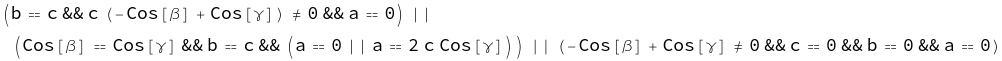

In [37]:
Reduce[b^2 == c^2 + a^2 - 2 c a Cos[\[Beta]] && 
  c^2 == a^2 + b^2 - 2 a b Cos[\[Gamma]] && b == c ]

In [38]:
% // FullSimplify

Cos[β] == Cos[γ] && b == c && a == 2 c Cos[γ]

簡約化が不完全なので、辺の長さに関する三角形の成立条件を仮定する:
$$a>0, b>0, c>0, (a+b)>c, (b+c)> a, (c+a)>b$$

In [39]:
$Assumptions = (a | b | c) \[Element] Reals && (a | b | c) > 0 && (a + b > c && b + c > a && c + a > b)

(a | b | c) ∈ Reals && (a | b | c) > 0 && a + b > c && b + c > a && a + c > b

In [40]:
%% // FullSimplify

Cos[β] == Cos[γ] && b == c && a == 2 c Cos[γ]

さらに角度の定義域を宣言する:
$$ 0 \leq \alpha  < \frac{\pi}{2}, 0 \leq \beta  < \frac{\pi}{2}, 0 \leq \gamma  < \frac{\pi}{2}$$

(a | b | c | α | β | γ) ∈ Reals && (a | b | c) > 0 && a + b > c && b + c > a && 
 
                          Pi             Pi             Pi
>   a + c > b && 0 <= α < -- && 0 <= β < -- && 0 <= γ < --
                          2              2              2
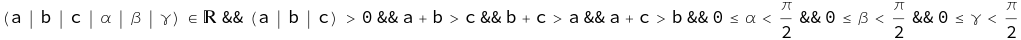

In [41]:
$Assumptions = (a | b | c | \[Alpha] | \[Beta] | \[Gamma]) \[Element] 
    Reals && (a | b | c) > 
    0 && (a + b > c && b + c > a && c + a > b) && 
   0 <= \[Alpha] < \[Pi]/2 && 0 <= \[Beta] < \[Pi]/2 && 
   0 <= \[Gamma] < \[Pi]/2

In [42]:
%% // FullSimplify

Cos[β] == Cos[γ] && b == c && a == 2 c Cos[γ]

* [Resolve—Wolfram Language Documentation](https://reference.wolfram.com/language/ref/Resolve.html)
    - attempts to resolve _expr_ into a form that eliminates ForAll and Exists quantifiers.
    - _expr_ を限定子ForAllとExistsを除去した形に結合しようと試みる．

Pi             Pi
ForAll[{β, γ}, Implies[Cos[β] == Cos[γ] && 0 <= β < -- && 0 <= γ < --, β == γ]]
                                                    2              2
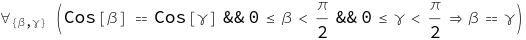

In [43]:
ForAll[{\[Beta], \[Gamma]}, (Cos[\[Beta]] == Cos[\[Gamma]] && 
    0 <= \[Beta] < \[Pi]/2 && 
    0 <= \[Gamma] < \[Pi]/2) \[Implies] \[Beta] == \[Gamma]]

Pi             Pi
ForAll[{β, γ}, Implies[Cos[β] == Cos[γ] && 0 <= β < -- && 0 <= γ < --, β == γ]]
                                                    2              2
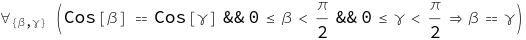

In [44]:
Resolve[%]

Mathematicaでは、代数的な手法、限定子 (限量子) の消去によって $\cos(\beta)=\cos(\gamma)$までは簡約化できるが、
さらに $\beta = \gamma$ まで簡約化できないので、解析的な手法を使う:

* [Solve: Solve an Equation—Wolfram Documentation](https://reference.wolfram.com/language/ref/Solve.html)
    - attempts to solve the system _expr_ of equations or inequalities for the variables _vars_.
    - 方程式あるいは不等式の系 _expr_ の解を変数 _vars_ について求めようとする．

{{γ -> ConditionalExpression[β, a ∈ Reals && b ∈ Reals && c ∈ Reals && α ∈ Reals && 
 
                Pi
>       0 < β < --]}, {β -> 
                2
 
>     ConditionalExpression[0, a ∈ Reals && b ∈ Reals && c ∈ Reals && α ∈ Reals], 
 
>    γ -> ConditionalExpression[0, a ∈ Reals && b ∈ Reals && c ∈ Reals && α ∈ Reals]}}
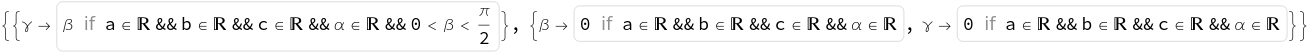

In [45]:
Solve[Cos[\[Beta]] == Cos[\[Gamma]]]

{{γ -> ConditionalExpression[β, β > 0]}, {β -> 0, γ -> 0}}
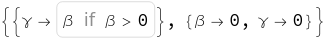

In [46]:
% // FullSimplify